# Realizar un pequeño análisis univariado de datos, teniendo en cuenta las características de las observaciones. Generar al menos 3 gráficos asociados.

In [13]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
import numpy as np
import scipy 
from funpymodeling.exploratory import profiling_num #pip install funpymodeling==0.1.7

## Prices (dataset) - lineplot data\year

In [3]:
prices = pd.read_csv('prices-split-adjusted.csv')
prices

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [5]:
profiling_num(prices)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,open,6.499362e+01,7.520389e+01,1.157097,7.82,14.36,3.127000e+01,4.846000e+01,7.512000e+01,1.546500e+02,3.688274e+02
1,close,6.501191e+01,7.520122e+01,1.156730,7.82,14.37,3.129278e+01,4.848000e+01,7.514000e+01,1.546694e+02,3.687374e+02
2,low,6.433654e+01,7.445952e+01,1.157344,7.69,14.17,3.094000e+01,4.797000e+01,7.440000e+01,1.530400e+02,3.650948e+02
3,high,6.563975e+01,7.590686e+01,1.156416,7.94,14.56,3.162000e+01,4.896000e+01,7.585000e+01,1.562000e+02,3.724200e+02
4,volume,5.415113e+06,1.249468e+07,2.307372,248600.00,476300.00,1.221500e+06,2.476250e+06,5.222500e+06,1.801397e+07,4.992493e+07


In [6]:
prices.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [67]:
prices['date']=pd.to_datetime(prices['date'])

<AxesSubplot:xlabel='date'>

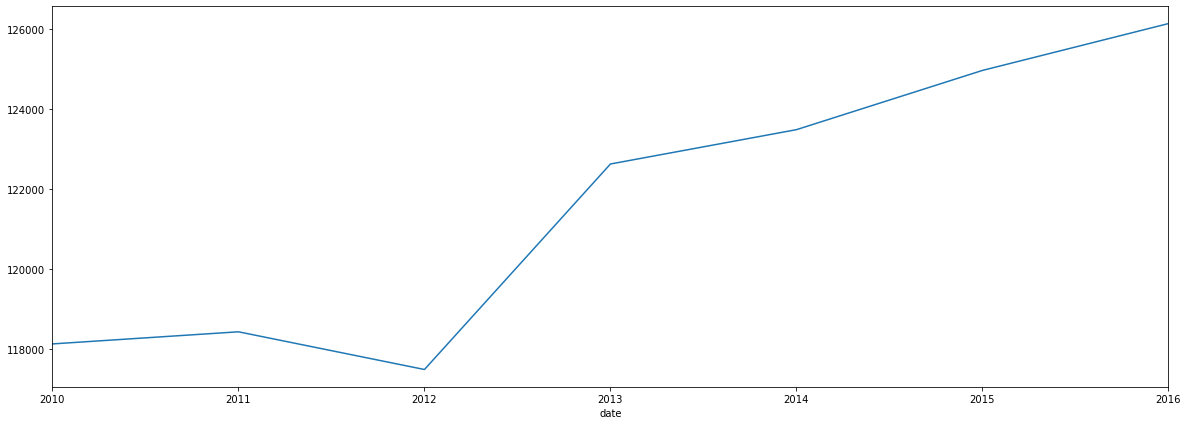

In [81]:
monthly_prices =prices.groupby(prices['date'].dt.to_period('Y')).size()
fig = plt.figure(figsize =(20, 7))
monthly_prices.plot.line()

In [74]:
scipy.stats.describe(monthly_prices)

DescribeResult(nobs=84, minmax=(8891, 11523), mean=10134.095238095239, variance=359453.1956397017, skewness=-0.08730619161903307, kurtosis=-0.6060180852337562)

In [75]:
scipy.stats.gmean(monthly_prices) # Media geometrica

10116.45328370534

In [76]:
scipy.stats.hmean(monthly_prices) # Media armonica

10098.695747590265

In [77]:
scipy.stats.mode(monthly_prices) # Moda

ModeResult(mode=array([9870]), count=array([9]))

## Securities (dataset) - Treemap/pyplot sub-sector industria de las empresas en el NYSE

In [9]:
securities = pd.read_csv('securities.csv')
securities

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [10]:
profiling_num(securities)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,CIK,707448.966337,514437.49491,0.727173,4906.32,15100.8,86312.0,831001.0,1075531.0,1523844.0,1635938.76


In [12]:
securities.describe()

,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [82]:
df_prueba = df[['GICS Sector','Ticker symbol']]
df2 = df_prueba.groupby('GICS Sector').agg('count')
#pie_borough = pie_borough.rename(columns={'DATE': 'Frecuencia'})
df2

,Ticker symbol
GICS Sector,
Consumer Discretionary,85
Consumer Staples,37
Energy,36
Financials,64
Health Care,59
Industrials,69
Information Technology,68
Materials,25
Real Estate,29


In [19]:
labels = df2.index

In [20]:
print(labels)

Index(['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Telecommunications Services', 'Utilities'],
      dtype='object', name='GICS Sector')


In [30]:
df2 = df_prueba.groupby('GICS Sector').agg('count')
df2

,Ticker symbol
GICS Sector,
Consumer Discretionary,85
Consumer Staples,37
Energy,36
Financials,64
Health Care,59
Industrials,69
Information Technology,68
Materials,25
Real Estate,29


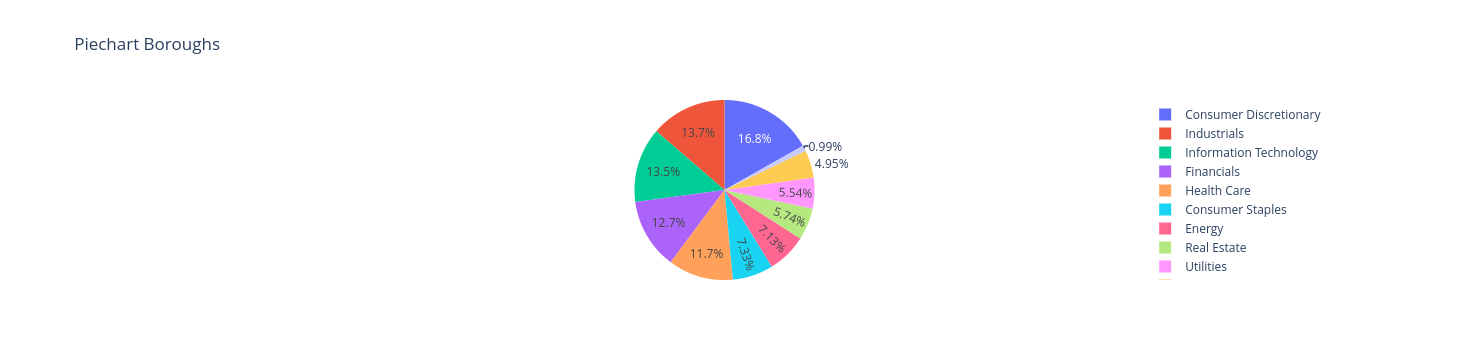

In [83]:
df_prueba=df[['GICS Sector','Ticker symbol']]
pie_borough = df_prueba.groupby('GICS Sector').agg('count')
pie_borough

import plotly.express as px
fig = px.pie(pie_borough, values='Ticker symbol', \
             names=pie_borough.index, title='Piechart Boroughs')
fig.show()

## Fundamentals (dataset)

In [14]:
fundamentals = pd.read_csv('fundamentals.csv')
fundamentals

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1776,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08
1777,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08
1778,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08
1779,1779,ZTS,2015-12-31,1.313000e+09,-58000000.0,-8.100000e+07,32.0,-2.240000e+08,1.012000e+09,65.0,...,3.830000e+09,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08


In [15]:
fundamentals.describe()

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.000000,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,890.000000,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,514.274732,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,445.000000,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,890.000000,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,1335.000000,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,1780.000000,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


In [16]:
profiling_num(fundamentals)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Unnamed: 0,8.900000e+02,5.142747e+02,0.577837,1.780000e+01,8.900000e+01,4.450000e+02,8.900000e+02,1.335000e+03,1.691000e+03,1.762200e+03
1,Accounts Payable,4.673418e+09,1.406047e+10,3.008606,0.000000e+00,1.413110e+08,5.160000e+08,1.334000e+09,3.246000e+09,1.678800e+10,5.745580e+10
2,Accounts Receivable,-6.353484e+07,7.562794e+08,-11.903381,-2.246504e+09,-6.230000e+08,-1.040000e+08,-1.830000e+07,7.816000e+06,3.590000e+08,1.455200e+09
3,Add'l income/expense items,6.908940e+07,6.848143e+08,9.912003,-7.884000e+08,-1.660000e+08,-2.638000e+06,2.000000e+06,3.359200e+07,4.620000e+08,1.605781e+09
4,After Tax ROE,4.360135e+01,2.339240e+02,5.365064,1.000000e+00,3.000000e+00,1.000000e+01,1.600000e+01,2.600000e+01,8.800000e+01,4.988000e+02
...,...,...,...,...,...,...,...,...,...,...,...
72,Total Revenue,2.029154e+10,4.095355e+10,2.018257,7.621852e+08,1.534615e+09,3.714000e+09,8.023200e+09,1.748600e+10,8.971600e+10,1.778298e+11
73,Treasury Stock,-3.951522e+09,1.407047e+10,-3.560772,-4.227860e+10,-1.764000e+10,-3.040895e+09,-3.068350e+08,0.000000e+00,0.000000e+00,0.000000e+00
74,For Year,2.013305e+03,1.995314e+01,0.009911,2.012000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.016000e+03
75,Earnings Per Share,3.353707e+00,4.695896e+00,1.400211,-5.209600e+00,-2.000000e-01,1.590000e+00,2.810000e+00,4.590000e+00,8.695000e+00,1.557110e+01
